## Question1
### What parts of the service should be improved to increase Spotify's premium subscribers?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Read file
- data name : Spotify User Behavior Dataset
- data source : kaggle datasets  
  (https://www.kaggle.com/datasets/meeraajayakumar/spotify-user-behavior-dataset)

In [2]:
df = pd.read_excel('../data/Spotify_User_Behavoir/Spotify_data.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age                          520 non-null    object
 1   Gender                       520 non-null    object
 2   spotify_usage_period         520 non-null    object
 3   spotify_listening_device     520 non-null    object
 4   spotify_subscription_plan    520 non-null    object
 5   premium_sub_willingness      520 non-null    object
 6   preffered_premium_plan       312 non-null    object
 7   preferred_listening_content  520 non-null    object
 8   fav_music_genre              520 non-null    object
 9   music_time_slot              520 non-null    object
 10  music_Influencial_mood       520 non-null    object
 11  music_lis_frequency          520 non-null    object
 12  music_expl_method            520 non-null    object
 13  music_recc_rating            520 no

### Regarding responses to subscription plans
- 18.5% of respondents are currently using a premium subscription
- 35.8% of respondents intend to continue or subscribe to premium services
- The percentage of users willing to use premium services is approximately twice  
  the percentage of users currently using the service.

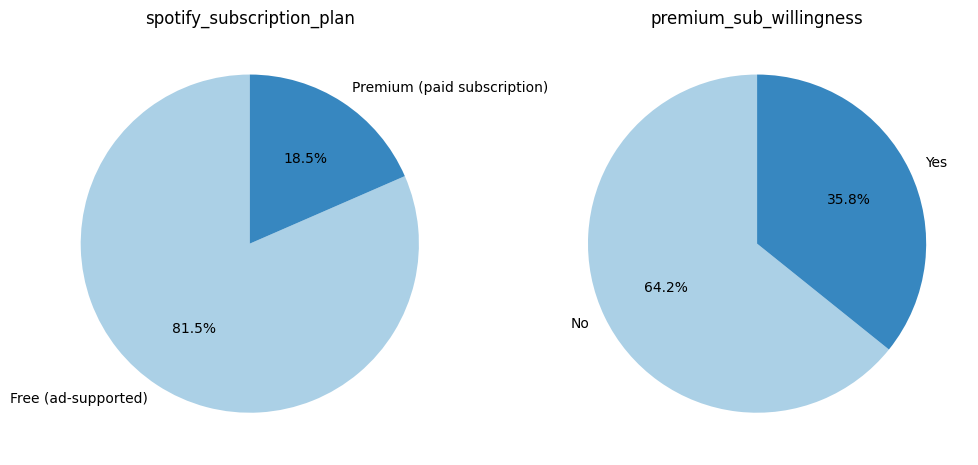

In [4]:
x1 = df["spotify_subscription_plan"].value_counts()
x2 = df["premium_sub_willingness"].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
color_p = sns.color_palette("Blues", n_colors=2)

ax1.pie(x1, labels=x1.index, autopct='%1.1f%%', startangle=90, colors=color_p)
ax1.set_title("spotify_subscription_plan")

ax2.pie(x2, labels=x2.index, autopct='%1.1f%%', startangle=90, colors=color_p)
ax2.set_title("premium_sub_willingness")

plt.show()

### Looking at the above response in more detail

- The percentage of users who have already subscribed to a premium service  
  and intends to continue using the service is 13.85%.
- This is three times higher than the rate of those wishing to cancel their subscription (4.62%).
- Free users are willing to use premium services, accounting for 21.92% of the total.
- This is about 1/3 of those who plan to continue using only free services (59.62%).

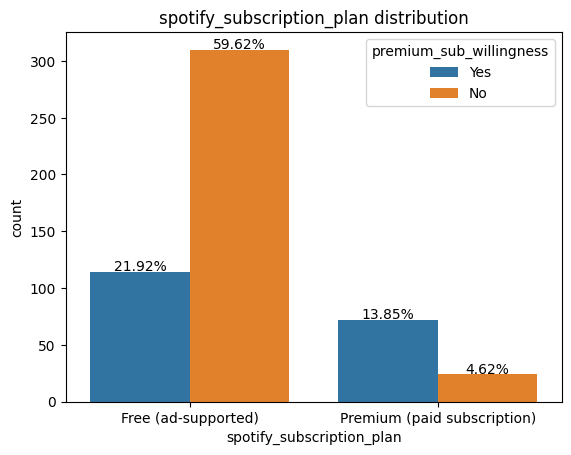

In [5]:
col_name = "spotify_subscription_plan"
order = df[col_name].value_counts().index

ax = sns.countplot(x=col_name, hue='premium_sub_willingness', data=df, order=order)

total = len(df) 
for p in ax.patches:
    percentage = (p.get_height() / total) * 100
    ax.text(p.get_x() + p.get_width() / 2, 
            p.get_height() + 1,
            f'{percentage:.2f}%', 
            ha="center")

plt.title(f"{col_name} distribution")
plt.show()

### Goals of service operation
- The goal is to increase the likelihood of premium subscription for users currently using free services  
  and to prevent users currently using premium services from leaving.

### what parts of the service should be improved to increase premium subscribers?
- To find out, let’s look at users’ service utilization rate and satisfaction  
  by dividing them into premium subscribers/free users.

#### Service content is divided into music and podcasts
- Free users use Music (67.50%) approximately 4.8 times more than Podcasts (14.04%).
- Premium users use Music (11.35%) about 1.6 times more than Podcasts (7.12%),  
  and tend to use both Podcasts and Music equally compared to free users.

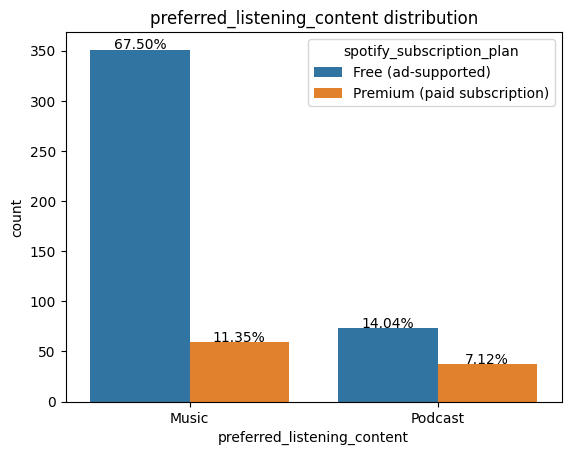

In [6]:
col_name = "preferred_listening_content"
order = df[col_name].value_counts().index

ax = sns.countplot(x=col_name, hue="spotify_subscription_plan", data=df, order=order)

total = len(df) 
for p in ax.patches:
    percentage = (p.get_height() / total) * 100
    ax.text(p.get_x() + p.get_width() / 2, 
            p.get_height() + 1,
            f'{percentage:.2f}%', 
            ha="center")

plt.title(f"{col_name} distribution")

plt.show()

#### 'Playlists' and 'Recommendations' are the main methods users use to discover new music.

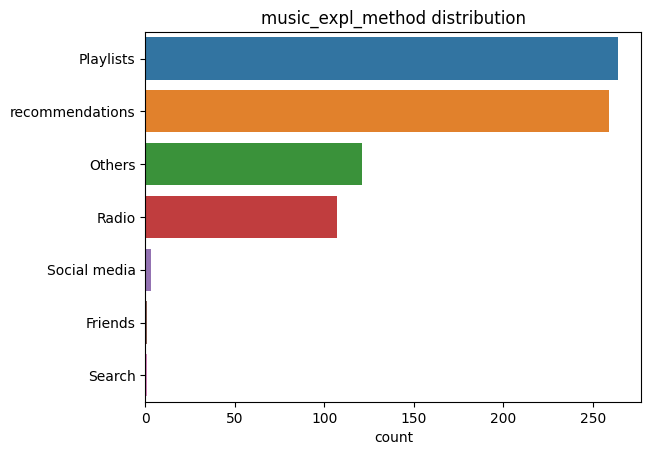

In [7]:
col_name = "music_expl_method"

all_responses = []
for response in df[col_name]:
    all_responses.extend([item.strip() for item in response.split(',')])

order = pd.Series(all_responses).value_counts().index

sns.countplot(y=all_responses, order=order)

plt.title(f"{col_name} distribution")

plt.show()

#### Looking at the satisfaction level of the recommendation system
- 3 points is the highest in both premium/free user groups.
- The average score is higher for free users (3.58) than for premium users (3.15).

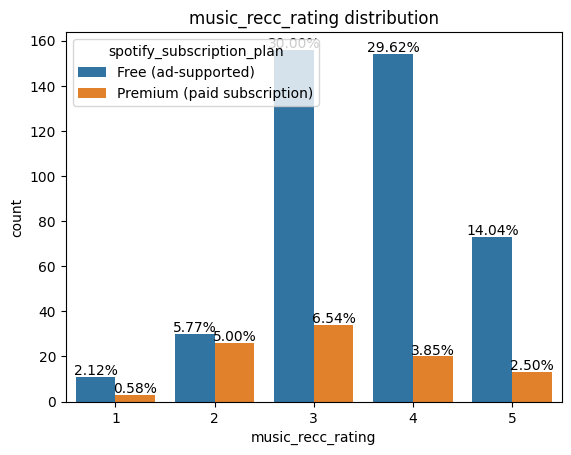

Premium user:  3.15
Free user:  3.58


In [8]:
col_name = "music_recc_rating"
order = [1, 2, 3, 4, 5]

ax = sns.countplot(x=col_name, hue="spotify_subscription_plan", data=df, order=order)

total = len(df) 
for p in ax.patches:
    percentage = (p.get_height() / total) * 100
    ax.text(p.get_x() + p.get_width() / 2, 
            p.get_height() + 1,
            f'{percentage:.2f}%', 
            ha="center")

plt.title(f"{col_name} distribution")

plt.show()

print("Premium user: ", df[df["spotify_subscription_plan"]=="Premium (paid subscription)"]['music_recc_rating'].mean().round(2))
print("Free user: ", df[df["spotify_subscription_plan"]=="Free (ad-supported)"]['music_recc_rating'].mean().round(2))

#### statistical test
- Is the mean difference between the two groups calculated above really meaningful?
- An independent two-sample t-test was performed to test the difference in means between the two groups.
- Since the prerequisite for the t-test is that the variances of the two groups are the same,  
  Levene's test, which tests the homogeneity of variances, must first be performed.
- As a result of the test (the p-value threshold is 0.05),  
  it was statistically confirmed that   
  free users gave the music recommendation system more generous ratings.

In [9]:
Gp_premium = df[df["spotify_subscription_plan"]=="Premium (paid subscription)"]['music_recc_rating'].values
Gp_free = df[df["spotify_subscription_plan"]=="Free (ad-supported)"]['music_recc_rating'].values

# Levene's test

w, p_value_levene = stats.levene(Gp_premium, Gp_free)
if p_value_levene < 0.05:
    equal_var = False
else:
    equal_var = True

# Independent Two Sample t-test

t_stat, p_value_ttest = stats.ttest_ind(Gp_premium, Gp_free, equal_var=equal_var)

if p_value_ttest < 0.05:
    print("There is a significant difference in the means between the two groups.")
else:
    print("There is no significant difference in the means between the two groups.")

There is a significant difference in the means between the two groups.


#### Will satisfaction with the recommendation system among free users have a positive effect on premium subscriptions?
- When calculating the average satisfaction score  
  by dividing into the "Free user & premium_sub_willingness = Yes" group  
  and the "Free user & premium_sub_willingness = No" group,
- the satisfaction score of the “Free user & premium_sub_willingness = No” group is higher.
- And when we performed a t-test on the difference between the means of the two groups,
- the result was that there was no significant difference.
- These results indicate that  
  high satisfaction with the recommendation system does not lead to premium subscriptions.

In [10]:
condition1 = df["spotify_subscription_plan"]=="Free (ad-supported)"
condition2 = df["premium_sub_willingness"]=="Yes"
condition3 = df["premium_sub_willingness"]=="No"

print("Free user & premium_sub_willingness = Yes: ", df[condition1&condition2]['music_recc_rating'].mean().round(2))
print("Free user & premium_sub_willingness = No: ", df[condition1&condition3]['music_recc_rating'].mean().round(2))

Free user & premium_sub_willingness = Yes:  3.47
Free user & premium_sub_willingness = No:  3.63


In [11]:
Gp_free_1 = df[condition1&condition2]['music_recc_rating'].values
Gp_free_2 = df[condition1&condition3]['music_recc_rating'].values

# Levene's test

w, p_value_levene = stats.levene(Gp_free_1, Gp_free_2)
if p_value_levene < 0.05:
    equal_var = False
else:
    equal_var = True

# Independent Two Sample t-test

t_stat, p_value_ttest = stats.ttest_ind(Gp_free_1, Gp_free_2, equal_var=equal_var)

if p_value_ttest < 0.05:
    print("There is a significant difference in the means between the two groups.")
else:
    print("There is no significant difference in the means between the two groups.")

There is no significant difference in the means between the two groups.


#### Looking at the satisfaction level of the variety and availability of podcasts
- "Ok" level is the highest in both premium/free user groups.
- Let’s perform a statistical test by converting the satisfaction level into a score.

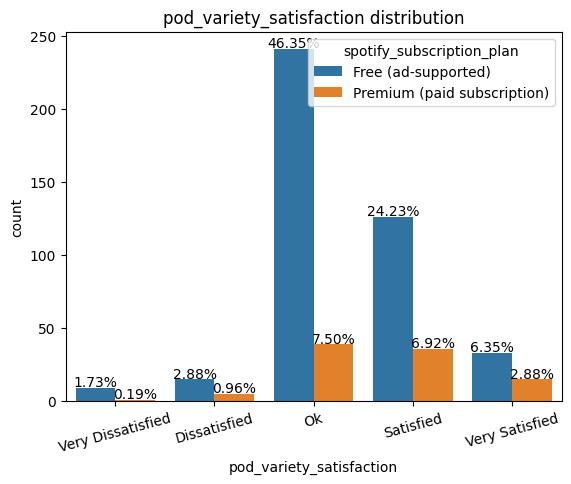

In [12]:
col_name = "pod_variety_satisfaction"
order = ['Very Dissatisfied', 'Dissatisfied', 'Ok', 'Satisfied', 'Very Satisfied']

ax = sns.countplot(x=col_name, hue="spotify_subscription_plan", data=df, order=order)

total = len(df) 
for p in ax.patches:
    percentage = (p.get_height() / total) * 100
    ax.text(p.get_x() + p.get_width() / 2, 
            p.get_height() + 1,
            f'{percentage:.2f}%', 
            ha="center")
    
plt.xticks(rotation=15)
plt.title(f"{col_name} distribution")

plt.show()

In [13]:
satisfaction_mapping = {
    'Very Dissatisfied': 1,
    'Dissatisfied': 2,
    'Ok': 3,
    'Satisfied': 4,
    'Very Satisfied': 5
}

df['pod_variety_satisfaction_rating'] = df['pod_variety_satisfaction'].map(satisfaction_mapping)

In [14]:
print("Premium user: ", df[df["spotify_subscription_plan"]=="Premium (paid subscription)"]['pod_variety_satisfaction_rating'].mean().round(2))
print("Free user: ", df[df["spotify_subscription_plan"]=="Free (ad-supported)"]['pod_variety_satisfaction_rating'].mean().round(2))

Premium user:  3.61
Free user:  3.38


#### statistical test
- The average score is higher for Premium users (3.61) than for Free users (3.38).
- As a result of the test, it was statistically confirmed that  
  premium users gave the podcast system more generous ratings.

In [15]:
Gp_premium = df[df["spotify_subscription_plan"]=="Premium (paid subscription)"]['pod_variety_satisfaction_rating'].values
Gp_free = df[df["spotify_subscription_plan"]=="Free (ad-supported)"]['pod_variety_satisfaction_rating'].values

# Levene's test

w, p_value_levene = stats.levene(Gp_premium, Gp_free)
if p_value_levene < 0.05:
    equal_var = False
else:
    equal_var = True

# Independent Two Sample t-test

t_stat, p_value_ttest = stats.ttest_ind(Gp_premium, Gp_free, equal_var=equal_var)

if p_value_ttest < 0.05:
    print("There is a significant difference in the means between the two groups.")
else:
    print("There is no significant difference in the means between the two groups.")

There is a significant difference in the means between the two groups.


#### Will premium users' satisfaction with podcasts have a positive impact on continued premium subscriptions?
- When calculating the average satisfaction score  
  by dividing into groups of "Premium users & premium_sub_willness = Yes"  
  and "Premium users & premium_sub_willingness = No",  
- the ‘Premium User & premium_sub_willingness = Yes’ group has a higher satisfaction score.
- And when a t-test was performed on the difference between the means of the two groups,
- the result was that there was a significant difference.
- These results indicate that   
  high satisfaction with podcasts has a positive effect on premium subscriptions.

In [16]:
condition1 = df["spotify_subscription_plan"]=="Premium (paid subscription)"
condition2 = df["premium_sub_willingness"]=="Yes"
condition3 = df["premium_sub_willingness"]=="No"

print("Premium user & premium_sub_willingness = Yes: ", df[condition1&condition2]['pod_variety_satisfaction_rating'].mean().round(2))
print("Premium user & premium_sub_willingness = No: ", df[condition1&condition3]['pod_variety_satisfaction_rating'].mean().round(2))

Premium user & premium_sub_willingness = Yes:  3.74
Premium user & premium_sub_willingness = No:  3.25


In [17]:
Gp_premium_1 = df[condition1&condition2]['pod_variety_satisfaction_rating'].values
Gp_premium_2 = df[condition1&condition3]['pod_variety_satisfaction_rating'].values

# Levene's test

w, p_value_levene = stats.levene(Gp_premium_1, Gp_premium_2)
if p_value_levene < 0.05:
    equal_var = False
else:
    equal_var = True

# Independent Two Sample t-test

t_stat, p_value_ttest = stats.ttest_ind(Gp_premium_1, Gp_premium_2, equal_var=equal_var)

if p_value_ttest < 0.05:
    print("There is a significant difference in the means between the two groups.")
else:
    print("There is no significant difference in the means between the two groups.")

There is a significant difference in the means between the two groups.


### Analysis
- Previously, the two goals of the service were defined below.
- 1) Increasing the likelihood of free users signing up for a premium subscription
- 2) Preventing premium users from canceling their subscription
- In order to find ways to improve the service to achieve the goal,  
  I analyzed it by dividing it into music streaming service and podcast service.
- The results of the analysis showed that  
  improving podcast services can have a positive impact on premium users continuing to subscribe.